## 简单线性回归

需要先使用conda命令安装机器学习包：sklearn，安装命令：
conda install scikit-learn

In [2]:
from collections import OrderedDict
import pandas as pd

In [48]:
#数据集
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
examOrderDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderDict)

In [49]:
examDf.head()

,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [50]:
#提取特征和标签
#特征features
exam_X=examDf.loc[:,'学习时间']
#标签labes
exam_y=examDf.loc[:,'分数']

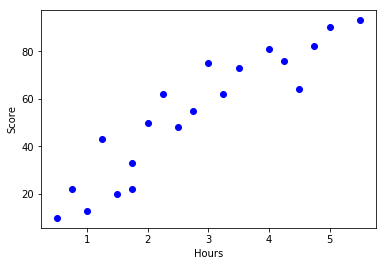

In [51]:
#绘制散点图
import matplotlib.pyplot as plt

#散点图
plt.scatter(exam_X, exam_y, color="b", label="exam data")

#添加图标标签
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()

In [52]:
'''
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）
第一个参数：所要划分的样本特征
第2个参数：所要划分的样本标签
train_size：训练数据占比，如果是整数的话就是样本的数量
'''

from sklearn.cross_validation import train_test_split

#建立训练数据和测试数据
X_train , X_test , y_train , y_test = train_test_split(exam_X ,
                                                       exam_y ,
                                                       train_size = .8)
#输出数据大小
print('原始数据特征：',exam_X.shape ,
      '，训练数据特征：', X_train.shape , 
      '，测试数据特征：',X_test.shape )

print('原始数据标签：',exam_y.shape ,
      '训练数据标签：', y_train.shape ,
      '测试数据标签：' ,y_test.shape)

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


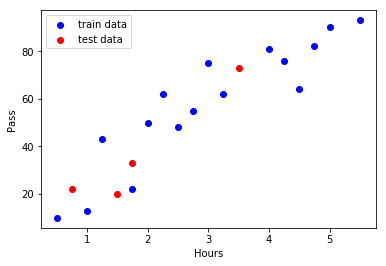

In [53]:
#绘制散点图
import matplotlib.pyplot as plt

#散点图
plt.scatter(X_train, y_train, color="blue", label="train data")
plt.scatter(X_test, y_test, color="red", label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Pass")
#显示图像
plt.show()

In [54]:
'''
运行后会报错，因为这里输入的特征只有1个。注意看报错信息，通过这个例子也学会如何分析报错信息
'''
#第1步：导入线性回归
from sklearn.linear_model import LinearRegression
# 第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train , y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.75  3.25  4.75  3.    2.25  4.5   2.    2.5   4.25  4.    5.5   1.25
  5.    0.5   1.75  1.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
'''
上面的报错内容，最后一行是这样提示我们的：
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
上面报错的内容翻译过来就是：
如果你输入的数据只有1个特征，需要用array.reshape(-1, 1)来改变数组的形状
shape是形状的意思，有首歌叫《shape of you》里面指的是女孩的身材令人难以忘记。在数据里就是指数据的大小。
numpy的reshape就是指改变数组的形状，下面通过几个案例你就明白了
'''

'\n上面的报错内容，最后一行是这样提示我们的：\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.\n上面报错的内容翻译过来就是：\n如果你输入的数据只有1个特征，需要用array.reshape(-1, 1)来改变数组的形状\nshape是形状的意思，有首歌叫《shape of you》里面指的是女孩的身材令人难以忘记。在数据里就是指数据的大小。\nnumpy的reshape就是指改变数组的形状，下面通过几个案例你就明白了\n'

In [26]:
import numpy as np
#定义2行*3列的数组
aArr = np.array([
    [1, 2, 3],
    [5, 6, 7]
])
aArr.shape

(2, 3)

In [27]:
#改变数组形成为3行*2列
bArr=aArr.reshape(3,2)
bArr.shape

(3, 2)

In [28]:
'''
reshape行的参数是-1表示什么呢？例如reshape(-1,列数)
如果行的参数是-1，就会根据所给的列数，自动按照原始数组的大小形成一个新的数组，
例如reshape(-1,1)就是改变成1列的数组，这个数组的长度是根据原始数组的大小来自动形成的。
原始数组总共是2行*3列=6个数，那么这里就会形成6行*1列的数组
'''
cArr=aArr.reshape(-1,1)
cArr.shape

(6, 1)

In [29]:
'''
reshape列的参数是-1表示什么呢？例如reshape(行数,-1)
如果列的参数是-1，就会根据所给的行数，自动按照原始数组的大小形成一个新的数组，
例如reshape(1,-1)就是改变成1行的数组，这个数组的列数是根据原始数组的大小来自动形成的。
原始数组总共是2行*3列=6个数，那么这里就会形成1行*6列的数组
'''
dArr=aArr.reshape(1,-1)
dArr.shape
dArr

array([[1, 2, 3, 5, 6, 7]])

In [55]:
'''
理解了reshape后，我们再来看下逻辑回归模型
sklearn要求输入的特征必须是二维数组的类型，但是因为我们目前只有1个特征，所以需要用安装错误提示用reshape转行成二维数组的类型。
错误提示信息：Reshape your data either using array.reshape(-1, 1) if your data has a single feature
'''
#将训练数据特征转换成二维数组XX行*1列
X_train=X_train.values.reshape(-1,1)
#将测试数据特征转换成二维数组行数*1列
X_test=X_test.values.reshape(-1,1)

#第1步：导入线性回归
from sklearn.linear_model import LinearRegression
# 第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
'''
最佳拟合线：z=𝑎+𝑏x
截距intercept：a
回归系数：b
'''

#截距
a=model.intercept_
#回归系数
b=model.coef_

print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= 11.1707480711 ，回归系数b= [ 15.48742033]


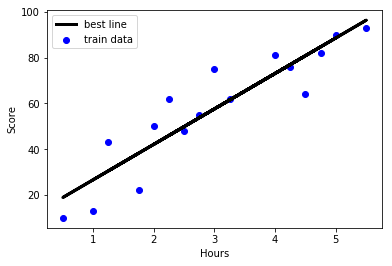

In [62]:
'''
绘图的代码不需要看懂，后面会有专门的课程讲如何将数据分析结果可视化
'''
#绘图
import matplotlib.pyplot as plt
#训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")

#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()

In [75]:
#相关系数：corr返回结果是一个数据框，存放的是相关系数矩阵
rDf=examDf.corr()
print('相关系数矩阵：')
rDf

相关系数矩阵：


,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


In [81]:
#线性回归的scroe方法得到的是决定系数R平方
#评估模型:决定系数R平方
model.score(X_test , y_test)

0.83901474742039228

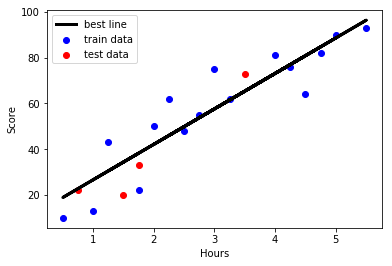

In [86]:
'''
绘图的代码不需要看懂，后面会有专门的课程讲如何将数据分析结果可视化
'''
#绘图
import matplotlib.pyplot as plt
#训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")

#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")

#测试数据散点图
plt.scatter(X_test, y_test, color='red', label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()